# Esquema para una Super-Plantilla DW (Ultra-bright)

## 1. Cargar librerías necesarias

In [1]:
# librerías de terceros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_profiling import ProfileReport

In [2]:

# ! pip install xlrd

In [3]:
# ajustes para ver mejor todo:
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', '{:.3f}'.format)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',None)
# por si nos hace falta matplotlib
%matplotlib inline

## 2. Cargar el dataset

In [4]:
df_train = pd.read_csv("./mascotas/train.csv")
df_test = pd.read_csv("./mascotas/test.csv")
#df.set_index('Name',inplace=True)
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie.",850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgently. It about 1 1/2 months old. My cat got pregnant before we got the chance to get its muted. The kittens are healthy and are eating kittens biscuits now. They are very playful and love being pat I prefer the kittens to be going to the same home but I do understands and its can be adopt separately. I'm hopping the kittens will get a lovely home soon,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and Eddie(male cat- white and cream) is 1 years plus. Both are toilet train and can't be separated. Needs a loving home together.,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love humans. Very friendly.",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..she just hates cages..but loves climbing trees and rooftops..however she is very loving.,e4da1c9e4,3.0,4


In [5]:
#df[df['Name']=="A. Sánchez"]

### 2.1. Si falla la carga, utilizar chardet para la codificación correcta del dataset

### 2.2. En caso de tener muchos ficheros a cargar

## 3. Realizar el EDA automático

### 3.1. Pandas-Profiling

In [ ]:
# en caso de que el fichero se muy grande
# df = df.sample(int(len(df)/10))

In [ ]:
automatico = ProfileReport(df) #,minimal=True)
nombre_salida = 'EDA_FIFA'
automatico.to_file(output_file=nombre_salida)

### 3.2. DTale

### 3.3. Crear un EDA Personal

## 4. DW

### 4.1. Obtenemos Info() para saber qué tipo ha asignado a cada columna

In [ ]:
df.info()

#### 4.1.1. Si Pandas no reconoce correctamente el tipo de alguna columna, resolver.

#### 4.1.2. Eliminación de columnas irrelevantes o que no se podrá sacar información posteriormente

In [6]:
columnas = ['Name','RescuerID','Description','PetID']
df_train.drop(columnas,axis = 1,inplace=True)
df_test.drop(columnas,axis=1,inplace=True)
df_train.info()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,0,3.0,2
14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,0,3.0,4
14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,0,5.0,3
14991,2,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,0,3.0,4


#### 4.1.3. Eliminación de filas duplicadas si es necesario y conveniente

In [7]:
# eliminar filas duplicadas
df=df.drop_duplicates(df.columns.to_list())
df

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,1,6,195,0,2,1,7,0,1,3,1,1,2,1,1,0,41401,0,1.0,0
14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,0,3.0,2
14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,0,3.0,4
14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,0,5.0,3


### 4.2. Separamos columnas numéricas de categóricas en listas distintas. Separamos en otra lista las columnas temporales. Incluso las booleanas.

In [8]:
numericas= [x for x in df.dtypes.index if (df.dtypes[x]=='float64' or df.dtypes[x]=='int64')]
categoricas= [x for x in df.dtypes.index if (df.dtypes[x]=='O' or df.dtypes[x]=='object')]
fechas = [x for x in df.dtypes.index if (df.dtypes[x]=='datetime64')]
booleanas = [x for x in df.dtypes.index if (df.dtypes[x]=='bool')]
print("Numericas")
print(numericas)
print("Categoricas")
print(categoricas)
print("Fechas")
print(fechas)
print("Booleanas")
print(booleanas)

Numericas
['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt', 'PhotoAmt', 'AdoptionSpeed']
Categoricas
[]
Fechas
[]
Booleanas
[]


Para determinar si OneHot o LabelEncoding, buscar los valores únicos de las columnas categóricas y decidid: Maximo Label Encoding (hasta 5, siempre y cuando se "orienten" los valores por conocimiento del negocio)

In [9]:
df[categoricas].nunique()

Series([], dtype: float64)

In [10]:
print(categoricas)


[]


In [11]:
# por tanto todas son one hot
df_num = pd.get_dummies(df, columns=categoricas, prefix=[])

In [12]:
df_num

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,1,6,195,0,2,1,7,0,1,3,1,1,2,1,1,0,41401,0,1.0,0
14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,0,3.0,2
14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,0,3.0,4
14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,0,5.0,3


In [13]:
df_num = df_num.reset_index()

#### 4.2.1 (Opcional) Eliminar todos los elementos no deseados, convertir a númerico (OneHot, LabelEncoding) y realizar un Feature Importances preeliminar

In [ ]:
#! pip install sklearn

Feature ranking:
1. feature Age (0.111046)
2. feature index (0.110843)
3. feature PhotoAmt (0.093790)
4. feature Breed1 (0.068319)
5. feature Color1 (0.065607)
6. feature Color2 (0.062092)
7. feature State (0.061860)
8. feature MaturitySize (0.045616)
9. feature Breed2 (0.043794)
10. feature Fee (0.041463)
11. feature Sterilized (0.040208)
12. feature Quantity (0.039240)
13. feature FurLength (0.038657)
14. feature Color3 (0.037981)
15. feature Dewormed (0.036842)
16. feature Gender (0.035404)
17. feature Vaccinated (0.028840)
18. feature Health (0.013422)
19. feature VideoAmt (0.013020)
20. feature Type (0.011957)


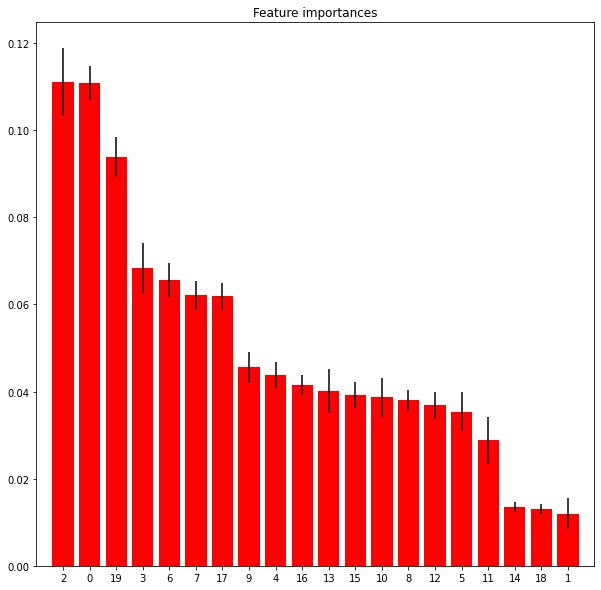

In [41]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
# Feature importances
#prefijos = ['Name_']

def F_importances(X,y):
    # Construye un arbol para así conocer la importancia de las columnas
    forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
    columnas = X.columns.to_list()
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, columnas[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])


#F_importances(df_num.drop(["AdoptionSpeed"],axis = 1),df_num['AdoptionSpeed'])

In [ ]:
# ahora sin Overall y Potential
F_importances(df_num.drop(["Value","Overall","Potential"],axis = 1),df_num['Value'])

#### 4.2.2 (Opcional) En caso contrario hacer una matriz de correlación con el target

In [ ]:
correlacion = df.corr()
sns.heatmap(correlacion, annot=True)
plt.show()

### 4.3. Determinamos si tenemos pocos datos. En ese caso, buscaríamos nuevos conjuntos de datos (scrapping, otras fuentes) y los unimos (merge, concat) con los que tenemos (por filas o por columnas)

#### 4.3.1 Convertimos la columna Preferred Positions en una serie de columnas One hot

In [ ]:
df["Pref_pos_list"] = df["Preferred Positions"].str.split(" ")
positions = [f for f in df["Pref_pos_list"]]
positions = list(set([item for sublist in positions for item in sublist]))
positions.remove("")

for position in positions:
    print(position)
    df[position]=df['Pref_pos_list'].apply(lambda lista_posiciones: 1 if position in lista_posiciones else 0)

df

In [ ]:
# hacemos que se quede una sola preferida y las one hot
df[['Preferida','Preferred Positions']]=df['Preferred Positions'].str.split(" ",n=1,expand=True)


In [ ]:
df = df.drop(['Pref_pos_list','Preferred Positions'],axis = 1)
df

### 4.4. Extraemos información necesaria del EDA automático, DTale o del nuestro:
#### - Nulos por columna

In [ ]:
df.isnull().sum()

#### - % valores únicos por filas y columnas

In [ ]:
df.nunique()  # columnas
# df.nunique(axis=1)  # filas

#### - Número de elementos por categoría en cada una de las columnas categóricas

In [ ]:
# como hemos hecho muchos cambios, vamos a volver a recalcular las 
# columnas numéricas y categóricas
numericas= [x for x in df.dtypes.index if (df.dtypes[x]=='float64' or df.dtypes[x]=='int64')]
categoricas= [x for x in df.dtypes.index if (df.dtypes[x]=='O' or df.dtypes[x]=='object')]

In [ ]:
for col in categoricas:
    print('\nFrecuencia de categorias para la columna %s'%col)
    print(df[col].value_counts(normalize=True)*100)

#### - Filas duplicadas

In [ ]:
df.duplicated().sum()

#### - (Opcional) Eliminar todos los elementos no deseados, convertir a númerico (OneHot, LabelEncoding) y realizar un Feature Importances preeliminar

### 4.5 Limpieza de nulos

En este caso no aplica por no haber nulos

#### - Estrategia: Eliminación "con violencia" de filas o columnas con nulos

#### - Estrategia: rellenado valor fijo (con 0s, etc)

#### - Estrategia: media, mediana, moda (valor más frecuente en categóricos)

#### - Estrategia: valores extremos de la distribución

#### - Estrategia: valores aleatorios dentro del rango de valores de la columna

#### - Estrategia: ML

### 4.6 Análisis y corrección de distribuciones

In [ ]:
df_copia = df.copy()
# esto es por si no queremos a los porteros. Comentad la linea si no
#df= df[df['Preferida']!="GK"]

In [ ]:
import pylab 
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()

##### Aquí podemos elegir la columna sobre la cual realizar el estudio, en cada una de las posibilidades se hagan 

In [ ]:
# mostramos histograma y Q-Q plot de las columnas numéricas que elijamos
correcto = False
while not(correcto):
    print(numericas)
    columna = input("Nombre de columna a estudiar y modificar su distribución:")
    if columna in numericas:
        correcto=True
        diagnostic_plots(df, columna)

In [ ]:
# ahora que ya vemos como está, pasamos a corregir las que no nos gusten
# se elige la que más nos guste
# creamos una copia para evitar añadir al df si no queremos
df2 = df.copy()

In [ ]:
print(columna)

In [ ]:
# transformación Logaritmica
df2[columna+'_log'] = np.log(df[columna])
diagnostic_plots(df2, columna+'_log')
print(df2[columna+"_log"].skew())
print(df2[columna+"_log"].kurt())

In [ ]:
# Reciproca
df2[columna+'_reciprocal'] = 1 / df[columna]
diagnostic_plots(df2, columna+'_reciprocal')
print(df2[columna+"_reciprocal"].skew())
print(df2[columna+"_reciprocal"].kurt())

In [ ]:
# transformacion de raiz cuadrada
df2[columna+'_sqr']  =df[columna]**(1/2)
diagnostic_plots(df2, columna+'_sqr')
print(df2[columna+"_sqr"].skew())
print(df2[columna+"_sqr"].kurt())

In [ ]:
# aurea
df2[columna+'_aur']  = df[columna]**(1/1.6)
diagnostic_plots(df2, columna+'_aur')
print(df2[columna+"_aur"].skew())
print(df2[columna+"_aur"].kurt())

In [ ]:
# exponencial
df2[columna+'_exp']  = df[columna]**(1/1.2)
diagnostic_plots(df2, columna+'_exp')
print(df2[columna+"_exp"].skew())
print(df2[columna+"_exp"].kurt())

In [ ]:
# boxcox
df2[columna+'_boxcox'], param = stats.boxcox(df[columna]) # ponemos la , porque da dos resultados
print('Optimal λ: ', param)
diagnostic_plots(df2, columna+'_boxcox')
print(df2[columna+"_boxcox"].skew())
print(df2[columna+"_boxcox"].kurt())

In [ ]:
# una vez elegida la transformación, basta copiarla sin el df2,
# por ejemplo si hemos escogido la áurea
# boxcox
# boxcox
df[columna+'_boxcox'], param = stats.boxcox(df[columna]) # ponemos la , porque da dos resultados
diagnostic_plots(df, columna+'_boxcox')

In [ ]:
df

##### Esto lo iremos repitiendo con todas las columnas numéricas y al final dejaremos esas columnas y no las originales cuando vayan al dataset

### 4.7 Tratamiento de outliers

#### 4.7.1. Detección de Outliers: Graficos Box-plot / Simetría y kurtosis

In [ ]:
correcto = False
while not(correcto):
    print(numericas)
    print()
    columna = input("Nombre de columna a estudiar sus outliers:")
    if columna in numericas:
        correcto=True
        simetria = df[columna].skew()
        kurto = df[columna].kurt()
        print("Simetría: ",simetria)
        print("Kurtosis: ",kurto)
        if (-0.1<simetria<0.1) and (-0.1<kurto<0.1):
            print("Se recomienda factor 3")
            factor = 3
        else:
            print("Se recomienda factor 1.5")
            factor = 1.5

In [ ]:
# como no son gaussianas, aplicaremos factor 1.5
fig = df.boxplot(column=columna)

In [ ]:
# hallamos los valores superior e inferior para Age
IQR = df[columna].quantile(0.75) - df[columna].quantile(0.25)

Lower_fence = df[columna].quantile(0.25) - (IQR * factor)
Upper_fence = df[columna].quantile(0.75) + (IQR * factor)

Upper_fence, Lower_fence, IQR

In [ ]:
# posibles outliers por encima
df[df[columna] > Upper_fence]

In [ ]:
# posibles outliers por debajo
df[df[columna] < Lower_fence]

#### 4.7.2. Tratamiento si es necesario

In [ ]:
respuesta = input("¿Corregimos automáticamente los outliers de la columna "+ columna+"(S/N)?")
if respuesta.lower()=="s":
    df.loc[df[columna] > Upper_fence, columna] = Upper_fence
    df.loc[df[columna] < Lower_fence, columna] = Lower_fence

### 4.8 Agrupamiento de categorias con pocas filas asociadas (categorias raras)

In [ ]:
for col in categoricas:
    print(col)
    print(df[col].value_counts() / len(df))

En este caso, no ha lugar a agrupar categorías

### 4.9 Correlaciones multivariable (numéricas)

In [ ]:
# En este punto, sólo podemos hacerlo con las columnas numéricas
df2=df[numericas]
# aplicamos
correlation_matrix = df2.corr().round(2)
# recordar que podemos introducir parámetros en la función .corr
# .corr(method='pearson', min_periods=1)*
# - method: aparte de pearson, puede ser además, kendall o spearman
# - min_periods: indica el número de periodos para que se considere una observación como válida

# annot=True te pone el valor de la correlacion
sns.heatmap(data=correlation_matrix, annot=True)

### 4.10 Seleccion de características / reducción de dimensionalidad

### 4.11 Ingeniería de características

Este apartado está muy ligado a los datos, por lo que se rellenará con lo que se estime en cada dataset. Sólo se presentan ciertos apartados para ser trabajados si son necesarios.

#### - Fechas

#### - Crear columnas

In [ ]:
# volvemos a colocar el índice name como columna
df = df.reset_index()
df

In [ ]:
df['ValueWage']=df.apply(lambda dataframe: round(dataframe['Value']/dataframe['Wage'],2) if dataframe['Wage']!=0 else 0,axis=1)
media = df['ValueWage'].mean()
maximo = df['ValueWage'].max()
minimo = df['ValueWage'].min()
print("Media:",media)
print("Maximo:",maximo)
print("Minimo:",minimo)

In [ ]:
df[df['ValueWage']==maximo]

In [ ]:
df['EsNacional']=df.apply(lambda dframe: 1 if dframe['Nationality']==dframe['Club Country'] else 0,axis=1)
df["Sopravalutato"] = df['ValueWage'].apply(lambda x: 1 if (x>=media) else 0)
df["CuantoValueWage"] = df['ValueWage']-media
dif=maximo - media
df["(ValueWage-mean)%"] = df["ValueWage"].apply(lambda columna:(columna-media)*100/dif)
# media = 50%
# si es positivo, lo que pasa sea un porcentaje respecto a maximo - media
# 7980.153238 me paso  210000000-265000 = 35000.
#                 maximo  media = 
df.sort_values("(ValueWage-mean)%",ascending=False)

#### - Agregaciones varias

In [ ]:
datosCC = df.groupby("Club Country")['Value'].agg([np.sum, np.mean, np.std, np.max,np.min]).sort_values(by="mean",ascending=False).reset_index()
datosCC

In [ ]:
df=pd.merge(df, datosCC, on='Club Country')
df

In [ ]:
df["Value_Ponderado_Pais"]= df["Value"] / (df["amax"] - df["amin"]) * 100

#(amax-amin) ---> 100
#value  -----> x
df.sort_values(by="Value_Ponderado_Pais",ascending=False)

In [ ]:
datosPre = df.groupby("Preferida")['Value'].agg([np.sum, np.mean, np.std, np.max,np.min]).sort_values(by="mean",ascending=False).reset_index()
datosPre

In [ ]:
df=pd.merge(df, datosPre, on='Preferida')
df

In [ ]:
df["Value_Ponderado_Posicion"]= df["Value"] / (df["amax_y"] - df["amin_y"]) * 100

#(amax-amin) ---> 100
#value  -----> x
df.sort_values(by="Value_Ponderado_Posicion",ascending=False)

In [ ]:
# eliminamos columnas que han surgido
df.drop(['sum_x','mean_x','std_x','amax_x','amin_x','sum_y','mean_y','std_y','amax_y','amin_y'],axis=1,inplace=True)

In [ ]:
df.head(3)

In [ ]:
df.to_csv("FIFA-18-full.csv",index=False)


In [ ]:
df = pd.read_csv("FIFA-18-full.csv")
df

In [ ]:
# 
dataset_path = "Ligas.xlsx"
df_ligas = pd.read_excel(dataset_path, sheet_name="Hoja1")
df_ligas

In [ ]:
df=pd.merge(df, df_ligas, left_on='Club Ligue', right_on='Club Ligue')
df

In [ ]:
df=df.drop(['Club Country_y','Club Ligue'], axis=1)
df

In [ ]:
# ahora vamos a meter lo de Niccolo y Lola
dfpaises = pd.read_csv("List_countries_puntuada.csv")
dfpaises.drop(["Unnamed: 3"],axis=1,inplace=True)
dfpaises

In [ ]:
df = pd.merge(df, dfpaises, left_on="Club Country_x",right_on="Paese")
df

In [ ]:
df = df.drop(['Paese','Club Country_x'],axis = 1)

In [ ]:
df

Eliminamos Name, Nationality y Club, y pasaremos a one_hot la de continente


In [ ]:
df.drop(['Name','Nationality','Club'],axis=1,inplace=True)
df = pd.get_dummies(df, columns=["Continente"], prefix=["Cont"])
df

Nos ha faltado por hacer, si el jugador cambió de equipo, etc
También la separación entre porteros y no porteros

#### - Label encoding dirigido a resultados

In [ ]:
# vamos a darle más vidilla a las que son las preferidas
# En los one hot de posiciones a la columna cuya valor esté en Preferida, se le sumará 4
posiciones = ["RW","CB","CDM","LM","RM","GK","RB","ST","LB","LWB","CM","CF","LW","RWB","CAM"]
for posi in posiciones:
    print(posi)
    df[posi]=df.apply(lambda dfr: dfr[posi]+4 if dfr['Preferida']==posi else dfr[posi],axis=1)

# y ya nos cargamos la columna preferida
df.drop(['Preferida'],axis=1,inplace = True)
df

In [ ]:
df['Puntuacion_Pais'] = df['Puntuacion_Pais'].astype("int64")

In [ ]:
df.info()

In [ ]:
df.to_csv("FIFA_todo_numeros.csv",index=False)

#### - Creación de columnas que indican existencia de nulos o valores raros

#### - Expansión polinómica (Estricta / No estricta)

#### - Eliminación de columnas definitivamente

### 4.12 Conversión categóricas a numéricas

#### - Label Encoding

##### - One Hot

### 4.13 Separar Target de Características

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14617 entries, 13197 to 10089
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14617 non-null  int64  
 1   Age            14617 non-null  int64  
 2   Breed1         14617 non-null  int64  
 3   Breed2         14617 non-null  int64  
 4   Gender         14617 non-null  int64  
 5   Color1         14617 non-null  int64  
 6   Color2         14617 non-null  int64  
 7   Color3         14617 non-null  int64  
 8   MaturitySize   14617 non-null  int64  
 9   FurLength      14617 non-null  int64  
 10  Vaccinated     14617 non-null  int64  
 11  Dewormed       14617 non-null  int64  
 12  Sterilized     14617 non-null  int64  
 13  Health         14617 non-null  int64  
 14  Quantity       14617 non-null  int64  
 15  Fee            14617 non-null  int64  
 16  State          14617 non-null  int64  
 17  VideoAmt       14617 non-null  int64  
 18  Ph

In [43]:
df

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
13197,1,3,307,0,2,2,0,0,2,1,2,2,3,1,4,0,41332,0,4.0,4
956,2,36,266,0,1,1,2,0,3,1,1,1,1,1,1,0,41401,0,1.0,4
4670,1,3,307,0,2,5,0,0,2,1,2,1,2,1,1,0,41336,0,3.0,1
11943,1,9,202,307,2,1,0,0,3,2,1,1,1,1,1,0,41326,0,1.0,4
1205,2,2,292,299,3,2,6,7,2,1,2,2,2,1,4,0,41401,0,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,2,1,247,0,1,6,0,0,1,1,2,2,2,1,1,0,41326,0,2.0,4
733,1,2,307,0,1,5,0,0,3,1,3,3,3,1,1,0,41326,0,2.0,1
369,2,3,266,0,2,6,7,0,2,1,2,1,2,1,1,0,41336,0,3.0,2
15,1,78,218,205,1,1,7,0,2,2,3,3,3,1,1,0,41326,0,2.0,4


In [44]:
df = df.sample(len(df))
df

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
8704,2,2,266,0,3,1,4,7,1,1,2,1,2,1,6,0,41401,0,3.0,2
4058,2,3,285,266,3,4,6,7,2,2,2,2,2,1,5,0,41401,0,9.0,1
9082,2,4,266,303,2,1,2,6,2,1,2,1,2,1,1,0,41326,0,1.0,3
228,2,1,266,0,2,3,5,0,2,1,2,2,2,1,1,0,41326,0,7.0,2
6623,2,2,265,0,3,2,4,6,1,2,2,2,2,1,3,0,41326,0,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,2,17,264,0,2,1,0,0,2,3,1,1,2,1,1,0,41401,0,5.0,1
7639,1,18,307,0,1,2,7,0,2,1,3,3,3,1,1,0,41326,0,4.0,1
12571,2,12,266,0,1,7,0,0,3,1,3,3,2,2,1,0,41326,0,3.0,4
7398,1,4,307,0,2,2,0,0,2,2,2,1,2,1,1,0,41336,0,3.0,4


In [45]:
target ="AdoptionSpeed"

X = df.drop([target],axis = 1)
y = df[target]

In [46]:
# en crudo
target ="AdoptionSpeed"

X = df_num.drop([target],axis = 1)
y = df_num[target]

In [47]:
X

,index,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0
1,1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0
2,2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0
3,3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0
4,4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,14987,1,6,195,0,2,1,7,0,1,3,1,1,2,1,1,0,41401,0,1.0
14613,14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,0,3.0
14614,14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,0,3.0
14615,14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,0,5.0


### 4.14 Volver a aplicar Correlaciones y Feature Importances (sin estandarizado)

### 4.15 Aplicar Estandarización

In [48]:
def estandarizar(dataframe):
    media = dataframe.mean()
    desviacion_estandar = dataframe.std()
    return (dataframe - media)/desviacion_estandar

X = estandarizar(X)
X

,index,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,-1.716773,1.072875,-0.416858,0.571109,-0.602530,-1.137482,-0.708167,1.371133,-0.638632,-1.558008,-0.780800,0.403606,0.635768,0.156143,-0.185743,-0.397072,0.987351,-0.621803,-0.166111,-0.836147
1,-1.716542,1.072875,-0.525963,0.008328,-0.602530,-1.137482,-0.708167,-0.454006,-0.638632,0.253574,0.881926,1.900563,2.073870,1.910443,-0.185743,-0.397072,-0.273531,1.682635,-0.166111,-0.550834
2,-1.716311,-0.932011,-0.525963,0.703528,-0.602530,-1.137482,-0.136905,1.371133,-0.638632,0.253574,0.881926,-1.093351,-0.802334,0.156143,-0.185743,-0.397072,-0.273531,-0.621803,-0.166111,0.875732
3,-1.716080,-0.932011,-0.362305,0.703528,-0.602530,0.323039,-0.708167,-0.454006,-0.638632,0.253574,-0.780800,-1.093351,-0.802334,0.156143,-0.185743,-0.397072,1.617791,1.682635,-0.166111,1.161046
4,-1.715849,-0.932011,-0.525963,0.703528,-0.602530,-1.137482,-0.708167,-1.184061,-0.638632,0.253574,-0.780800,0.403606,0.635768,0.156143,-0.185743,-0.397072,-0.273531,-0.621803,-0.166111,-0.265521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,1.744463,-0.932011,-0.253199,-1.150339,-0.602530,0.323039,-0.708167,1.371133,-0.638632,-1.558008,2.544652,-1.093351,-0.802334,0.156143,-0.185743,-0.397072,-0.273531,1.682635,-0.166111,-0.836147
14613,1.744694,1.072875,-0.471410,0.024880,-0.602530,1.783561,-0.708167,-1.184061,-0.638632,0.253574,0.881926,0.403606,0.635768,0.156143,-0.185743,1.635140,-0.273531,-0.621803,-0.166111,-0.265521
14614,1.744925,1.072875,2.692645,0.008328,1.545854,1.783561,-0.708167,0.276050,1.694588,0.253574,0.881926,-1.093351,-0.802334,-1.598157,-0.185743,0.280332,-0.273531,-0.621803,-0.166111,-0.265521
14615,1.745156,1.072875,-0.471410,0.008328,1.562129,1.783561,1.576884,1.006105,1.694588,2.065156,0.881926,0.403606,-0.802334,1.910443,-0.185743,2.312545,0.104733,-0.621803,-0.166111,0.305106


### 4.16 (Opcional) Aplicar Feature Importances (con estandarizado)

Feature ranking:
1. feature Age (0.111046)
2. feature index (0.110843)
3. feature PhotoAmt (0.093790)
4. feature Breed1 (0.068319)
5. feature Color1 (0.065607)
6. feature Color2 (0.062092)
7. feature State (0.061860)
8. feature MaturitySize (0.045616)
9. feature Breed2 (0.043794)
10. feature Fee (0.041463)
11. feature Sterilized (0.040208)
12. feature Quantity (0.039240)
13. feature FurLength (0.038657)
14. feature Color3 (0.037981)
15. feature Dewormed (0.036842)
16. feature Gender (0.035404)
17. feature Vaccinated (0.028840)
18. feature Health (0.013422)
19. feature VideoAmt (0.013020)
20. feature Type (0.011957)


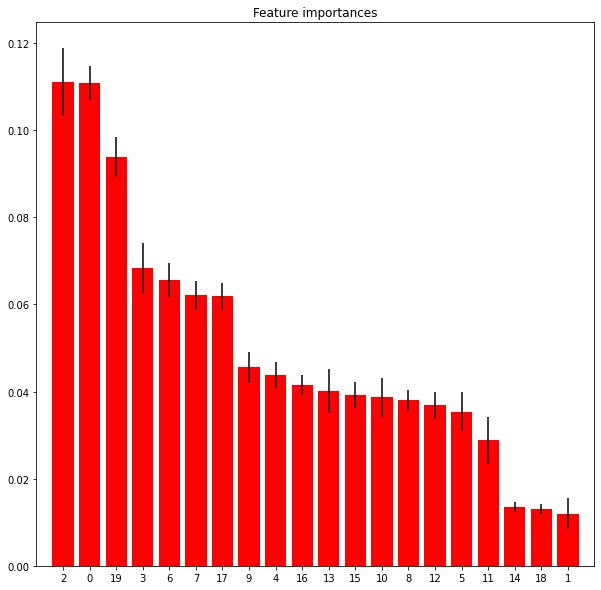

In [49]:
F_importances(X,y)

# (Opcional) Un vistazo a cómo se comportaría el Dataset

In [25]:
# cargamos algunas librerías de algoritmos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# métricas clasificacion
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split


# cargamos algunas librerías de algoritmos de regresion
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# métricas regresion
from sklearn.metrics import r2_score

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # los datos (features) nuestra X
    y,  # columna objetivo, nuestra y
    stratify=y,
    test_size=0.1,  # el 80% de las filas serán para entrenar y el 20% para probar si ha ido bien
    random_state=0) 

X_train.shape, X_test.shape

((13155, 20), (1462, 20))

In [63]:
# clasificacion

# Aquí deshabilitamos el modelo que necesitemos
# modelo = LogisticRegression(random_state=44)
# modelo = AdaBoostClassifier(n_estimators=200)
modelo = RandomForestClassifier(n_estimators=200, n_jobs=-1)

# Entrenamos modelo
modelo.fit(X_train, y_train)

# predicción sobre el conjunto de test
y_pred = modelo.predict(X_test)

# calculamos su acierto
print('Accuracy: {}'.format(modelo.score(X_test, y_test)))
#print('roc-auc: {}'.format(roc_auc_score(y_test, y_pred)))

Accuracy: 0.38919288645690836


In [57]:
# regresion

# Aquí deshabilitamos el modelo que necesitemos
#modelo = SVR(C=1.0)
#modelo = KNeighborsRegressor(n_jobs=-1)
#modelo = RandomForestRegressor(n_estimators = 200,n_jobs=-1)

# Entrenamos modelo
modelo.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [64]:
# predicción sobre el conjunto de test
y_pred = modelo.predict(X_test)

# calculamos su acierto
print('Accuracy: {}'.format(modelo.score(X_test, y_test)))
print('Accuracy Train: {}'.format(modelo.score(X_train, y_train)))
print('r2: {}'.format(r2_score(y_test, y_pred)))

Accuracy: 0.38919288645690836
Accuracy Train: 1.0
r2: -0.4161328395207935
